In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
users = pd.read_csv("takehome_users.csv", encoding="ISO-8859-1")

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


Last session creation time variable has about 3000+ missing values, while invited by user ID has about 5500 missing values.

In [5]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [6]:
#user engagement csv
engagement = pd.read_csv("takehome_user_engagement.csv", encoding= "ISO-8859-1")

In [7]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


Complete data, no missing values

## User Adopted

In [9]:
adopted = []

for u in users.object_id:
    keep = engagement[engagement['user_id'] == u]
    keep = keep.set_index('time_stamp')
    keep = keep.sort_index()
    keep = keep.rolling(window=7).visited.sum().max()
    if keep >= 3:
        adopted.append(1)
    else:
        adopted.append(0)

In [10]:
users['adopted'] = adopted

In [11]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000,12000.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145,0.135917
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968,0.342714
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000,0.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000,0.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000,0.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000,0.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000,1.000000


About 13% of the users are adopted users

In [12]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


Lets fill missing values

In [13]:
users['last_session_creation_time'] = users.last_session_creation_time.fillna(0)
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')

Lets measure the duration the user has been active.

In [14]:
users['creation_time']=pd.to_datetime(users['creation_time'])

In [15]:
def duration(x):
    zero=pd.to_datetime(0,unit='s')
    if x.last_session_creation_time==zero:
        return pd.Timedelta(0).days
    else:
        return pd.Timedelta(x.last_session_creation_time-x.creation_time).days/7




col=users.apply(lambda x: duration(x),axis=1)
users['activity_duration_weeks']=col
users=users.drop('creation_time',axis=1)
users=users.drop('last_session_creation_time',axis=1)


In [16]:
users.head()

,object_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,activity_duration_weeks
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,0,0.000000
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,1,19.428571
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,0,0.000000
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,0,0.142857
4,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,0,0.714286


Lets also convert the invited_by_user_id into a boolean since that can indicate whether they were invited or not, since there are missing values in this variable. 

In [17]:
users['invited_by_user_id']=pd.isna(users['invited_by_user_id']).astype('int')

In [18]:
users.head()

,object_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,activity_duration_weeks
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,0,0,0.000000
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,0,1,19.428571
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,0,0,0.000000
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,0,0,0.142857
4,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,0,0,0.714286


Lets have a look at whether the categorical variable of creation_source has any significance to user adoption rate. 

Text(0.5, 0, 'Source')

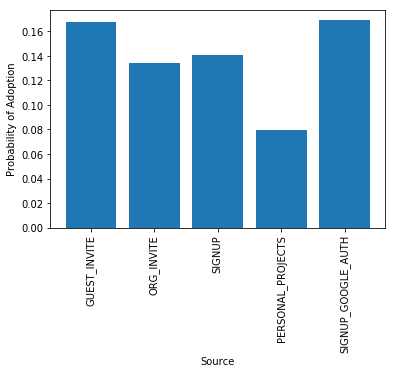

In [20]:
mean_source = []
for source in users.creation_source.unique():
    mean_source.append(users[users['creation_source'] == source].adopted.mean())

plt.bar(users.creation_source.unique(),mean_source)
plt.xticks(rotation=90)
plt.ylabel('Probability of Adoption')
plt.xlabel('Source')

Personal Projects has a significantly less probability of adoption compared to the others. Strong sources are Google and Guest Inivte.

Email and Name are variables that should be dropped as they will not be of any use moving further.

In [21]:
X=users.drop(['object_id','name','email','adopted','org_id'],axis=1)
Y=users['adopted']
X.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,activity_duration_weeks
0,GUEST_INVITE,1,0,0,0.000000
1,ORG_INVITE,0,0,0,19.428571
2,ORG_INVITE,0,0,0,0.000000
3,GUEST_INVITE,0,0,0,0.142857
4,GUEST_INVITE,0,0,0,0.714286


In [22]:
#Label Encoding source column
X = pd.concat([X,pd.get_dummies(X['creation_source'], prefix='source')], axis=1).drop(['creation_source'],axis=1)

In [23]:
X.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,activity_duration_weeks,source_GUEST_INVITE,source_ORG_INVITE,source_PERSONAL_PROJECTS,source_SIGNUP,source_SIGNUP_GOOGLE_AUTH
0,1,0,0,0.000000,1,0,0,0,0
1,0,0,0,19.428571,0,1,0,0,0
2,0,0,0,0.000000,0,1,0,0,0
3,0,0,0,0.142857,1,0,0,0,0
4,0,0,0,0.714286,1,0,0,0,0


## Machine Learning

Lets start applying some machine learning concepts to this data as we now are on a good standing to do so. The data is wrangled in a satisfactory manner.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [26]:
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
from sklearn.metrics import confusion_matrix,f1_score

print('Accuracy Score of Testing Data:')
print(model.score(X_test,y_test))
print('')
print('Confusion Matrix for testing data:')
print(confusion_matrix(y_test,model.predict(X_test)))
print('')
print('F1 Score for testing data:')
print(f1_score(y_test,model.predict(X_test)))

Accuracy Score of Testing Data:
0.9791666666666666

Confusion Matrix for testing data:
[[3033   49]
 [  26  492]]

F1 Score for testing data:
0.9291784702549575


In [28]:
print('Accuracy Score for Training Data of:')
print(model.score(X_train,y_train))
print('')
print('Confusion matrix for training data:')
print(confusion_matrix(y_train,model.predict(X_train)))
print('')
print('f1score for training data')
print(f1_score(y_train,model.predict(X_train)))

Accuracy Score for Training Data of:
0.9925

Confusion matrix for training data:
[[7259   28]
 [  35 1078]]

f1score for training data
0.9716088328075709


The results are quite good for the training data. Lets dive into further detail to see what features have the most influence over the data with "feature importances".

In [32]:
FI=pd.DataFrame()
FI['FeatureName']=X.columns
FI['importance']=model.feature_importances_
FI=FI.sort_values('importance',ascending=False)
FI

,FeatureName,importance
3,activity_duration_weeks,0.987023
0,opted_in_to_mailing_list,0.002832
1,enabled_for_marketing_drip,0.002733
6,source_PERSONAL_PROJECTS,0.002689
4,source_GUEST_INVITE,0.001119
8,source_SIGNUP_GOOGLE_AUTH,0.001044
5,source_ORG_INVITE,0.000967
7,source_SIGNUP,0.000864
2,invited_by_user_id,0.000730


## Final Thoughts

As we see here, activity_duration_weeks is the key factor in this dataset, as it has a 98% influence in the entire model. Relax Inc. should be advised to focus attention on convincing its users to start the session after signing up, since the likelihood of adoption will greatly increase the more they use it. 